In [1]:
from datetime import datetime
from typing import cast

import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
from matplotlib.container import BarContainer
from matplotlib.figure import Figure

HATCHES = ["/", "\\", "|", "-", "+", "x", "o", "O", ".", "*"]
COL_RENAMER = {
    "net": "Network", "Name": "Method",
    "Brier": "Brier Score",
    "RelTotTime": "Avg. Computation Time Overhead",
    "AvgCommVals": "Avg. #Communicated Values"
}


def make_save_barplot(df: pd.DataFrame, metric: str, xlim_r_mult: float, log_scale=False, fname: str|None=None) -> Axes:
    match metric:
        case "Brier":
            method_order = ["CC", "DOM", "CCBNet"]
        case "RelTotTime" | "AvgCommVals":
            method_order = ["DOM", "CCBNetJ", "CCBNet"]
        case _:
            raise ValueError("Unrecognised metric")

    df_ = df[df["Name"].isin(method_order)]
    df_ = df.rename(columns=COL_RENAMER)
    ax = sns.barplot(
        df_, x=COL_RENAMER[metric], y="Network", hue="Method",
        hue_order=method_order, orient="h")

    for container, hatch in zip(cast(list[BarContainer], ax.containers), HATCHES):
        ax.bar_label(container, label_type="edge", fontsize="xx-large")
        _x_lim_l, xlim_r = ax.get_xlim()
        ax.set_xlim(right=xlim_r_mult * xlim_r)

        for bar in container:
            bar.set_hatch(hatch)

    ax.legend(title="Method", fontsize="xx-large", title_fontsize="xx-large")
    ax.set_xlabel(xlabel=ax.get_xlabel(), fontsize="xx-large")
    ax.set_ylabel(ylabel=ax.get_ylabel(), fontsize="xx-large")
    ax.tick_params(axis="both", labelsize="xx-large")
    if log_scale:
        ax.set_xscale("log")

    if fname:
        # fix date for reproducibility
        cast(Figure, ax.get_figure()).savefig(
            f"{fname}.pdf", bbox_inches="tight",
            metadata={"CreationDate": datetime(year=2024, month=1, day=1)})

    return ax

In [2]:
related_df = pd.read_csv("results/related.csv", index_col=0)
related_df["net"] = related_df["net"].str.upper()
related_df = related_df[(related_df["nr_clients"] == 4) & (related_df["Overlap"] == 0.3)]

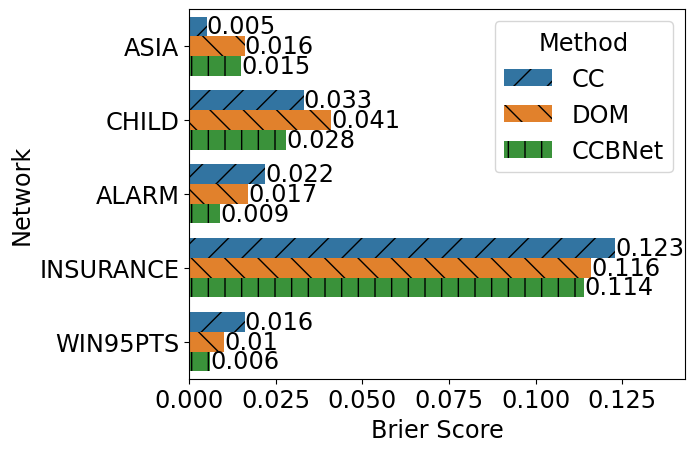

In [3]:
fig_brier_related = make_save_barplot(related_df, "Brier", 1.035, fname="pdfs/brier_related_4p_30o_new")

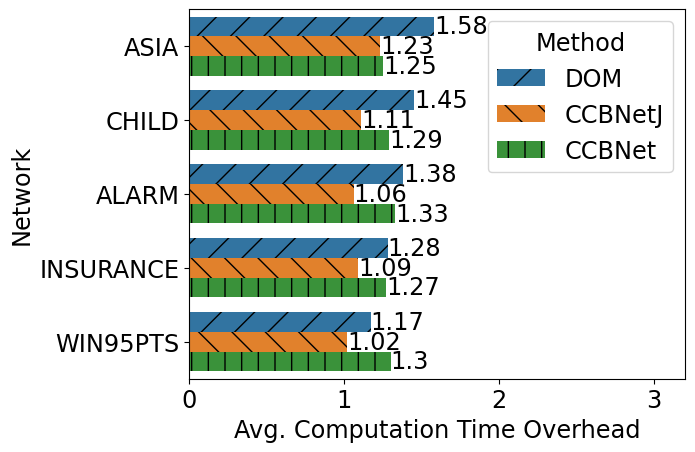

In [4]:
fig_time_related = make_save_barplot(related_df, "RelTotTime", 1.245, fname="pdfs/time_related_4p_30o_new")

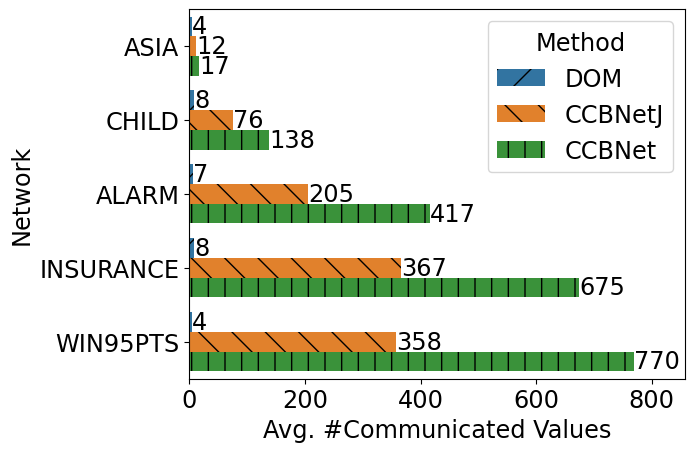

In [5]:
fig_comm_related = make_save_barplot(related_df, "AvgCommVals", 1.020, fname="pdfs/comm_related_4p_30o_new")

In [6]:
random_df = pd.read_csv("results/random.csv", index_col=0)
random_df["net"] = random_df["net"].str.upper()
random_df = random_df[(random_df["nr_clients"] == 4) & (random_df["Overlap"] == 0.3)]

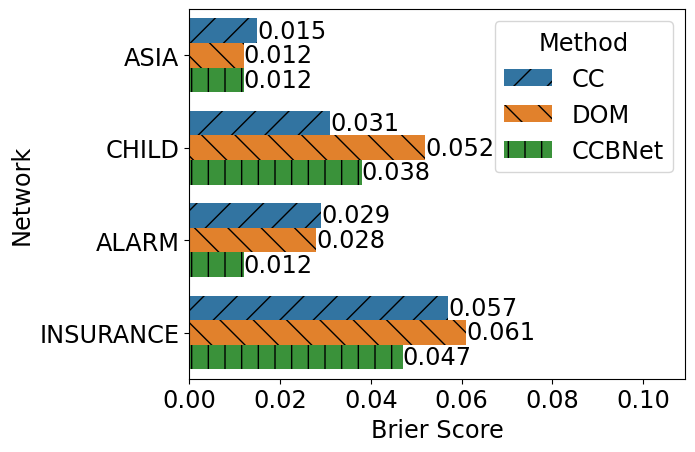

In [7]:
fig_brier_random = make_save_barplot(random_df, "Brier", 1.195, fname="pdfs/brier_random_4p_30o_new")

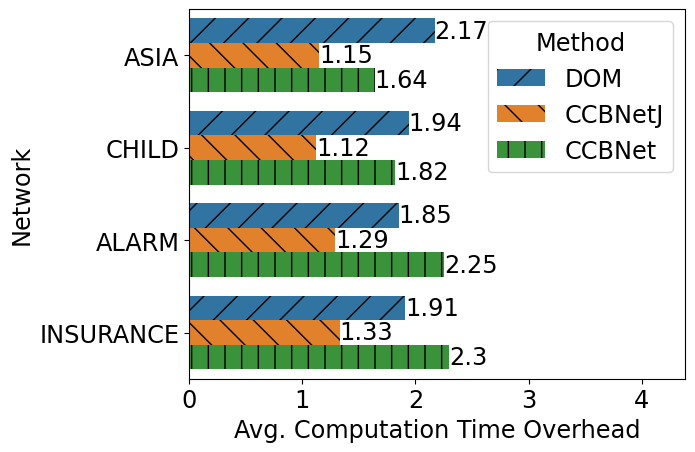

In [8]:
fig_time_random = make_save_barplot(random_df, "RelTotTime", 1.220, fname="pdfs/time_random_4p_30o_new")

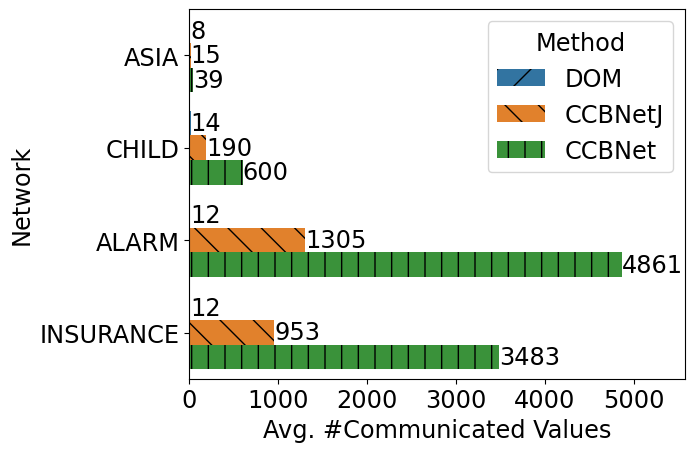

In [9]:
fig_comm_random = make_save_barplot(random_df, "AvgCommVals", 1.030, fname="pdfs/comm_random_4p_30o_new")